# Ejercicio 2 de la Guia 3

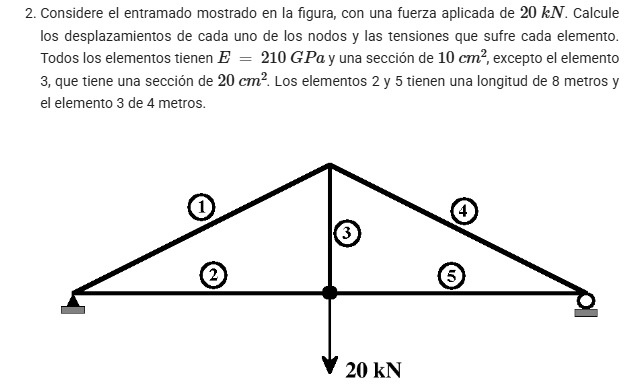

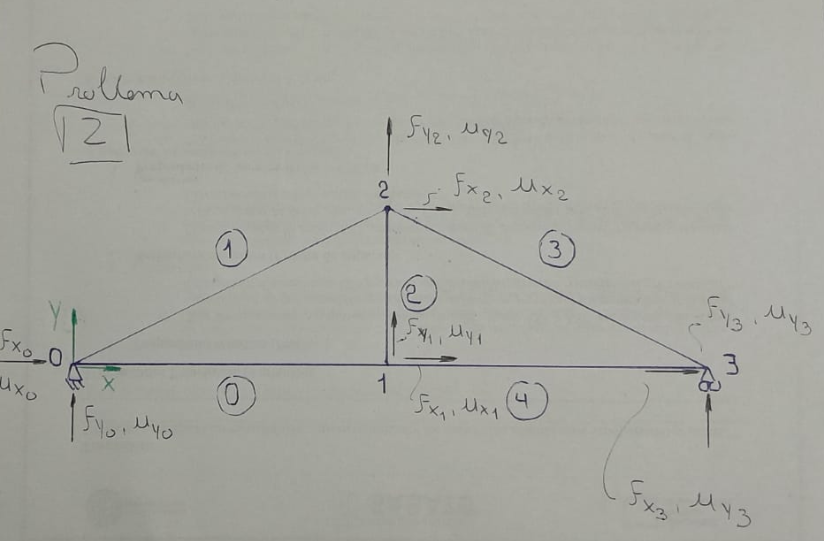

In [15]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [16]:


E = 210e9   # [PA]

#   Para este caso el sistema esta definido por 4 nodos:
#............... MATRIZ DE NODOS .............................................
#   Cada fila de la matriz representa cada nodo del sistema, en las columnas se ponen las coordenadas de cada nodo.

MN = np.array([[ 0 , 0 ],
               [ 8 , 0 ],
               [ 8 , 4 ],
               [ 16, 0 ]])

#   Se define la variable Grados de Libertar por Nodo (glxn)

glxn = 2    # Se tienen dos grados de libertad por cada nodo en el sistema

#.............................................................................

#.............. MATRIZ DE CONECTIVIDAD .......................................
#   Se tiene una fila por cada elemento que conforma el sistema y para cada elemento se completara con la lista de nodos
#   que lo conforma.

MC = np.array([[ 0 , 1 ],
               [ 0 , 2 ],
               [ 2 , 1 ],
               [ 2 , 3 ],
               [ 1 , 3 ]])

#.............. MATRIZ DE AREAS ..............................................

MA = np.array([10, 10, 20, 10, 10]) / (100*100)  # Convertir cm² a m²

In [ ]:
#   Para el problema defino la matriz de condiciones de contorno. 

#   La primera columna me indica el tipo de dato que conozco
#       Si es 0 se conoce la fuerza
#       Si es 1 se conoce el desplazamiento

b = np.array([[ 1 , 0 ],        # Para el nodo 0 en x
              [ 1 , 0 ],        # Para el nodo 0 en y
              [ 0 , 0 ],        # Para el nodo 1 en x
              [ 0 , -20000 ],        # Para el nodo 1 en y
              [ 0 , 0 ],        # Para el nodo 2 en x
              [ 0 , 0 ],        # Para el nodo 2 en x
              [ 1 , 0 ],        # Para el nodo 3 en x (Esta la considero asi ya que no se tiene ninguna carga aplicada en el eje X)
              [ 1 , 0 ]])       # Para el nodo 3 en y

In [18]:
def MatrizDeRigidez(MC, MN, E, A, glxn):

	n,m = MN.shape		# n es la cantidad de elementos que va a tener mi sistema

	K = np.zeros((n*glxn,n*glxn))	#	Defino la matriz global de mi sistema

	for e in range(n):  # Recorro los elementos del sistema

		#	Calculo el angulo tita y la longitud para cada elemento

		tita_e = np.arctan2( MN[ MC[e,1] , 1 ] - MN[ MC[e,0] , 1 ] , MN[ MC[e,1] , 0 ] - MN[ MC[e,0] , 0 ])

		L_e = np.sqrt( (MN[ MC[e,1] , 0 ] - MN[ MC[e,0] , 0])**2 + (MN[ MC[e,1] , 1 ] - MN[ MC[e,0] , 1 ])**2 )

		#	Calculo la constate k que acompaña a cada matriz para cada elemento 
		
		k_e = ( E * A[e] ) / L_e        #   (Se modifica para que tome el area de cada elemento)

		#	Se calcula la matriz de rotacion de cada elemento

		c = np.cos(tita_e)
		s = np.sin(tita_e)

		K_rot = k_e * np.array([[ c*c , c*s , -c*c , -c*s ],
						  		[ c*s , s*s , -c*s , -s*s ],
								[ -c*c , -c*s , c*c , c*s ],
								[ -c*s , -s*s , c*s , s*s ]])
		
		#	Son los nodos correspondiente al elemento del bucle

		ni = MC[e,0]
		nj = MC[e,1]

		indices = np.array([ ni * glxn , (ni + 1) * glxn -1 , nj * glxn , (nj + 1) * glxn - 1])
		
		#	Esta funcion es para crear una malla de indices.

		K[np.ix_(indices,indices)] += K_rot

		#print(K)
		#print(np.round(K_rot, 3))
		#print(np.round(K, 3))

	#print(K)
	return K

In [19]:
def ResolverSistemaMixto (A,b):
    #   Se define el vecctor de las fuerzas y los desplzamientos 

    n, m = np.shape(b)

    F = np.zeros([n,1])
    U = np.zeros([n,1])

    aux = b[:, 0] == 0  # Donde se conoce el valor de la fuerza
    aux2 = b[:, 0] == 1  # Donde se conoce el valor del desplazamiento

    I = np.arange(n) # Se define un vector de indices

    #print(aux)
    #print(aux2)

    f_indices = I[aux]   # Índices conocidos de fuerza
    #u_indices = I[aux2]  # Índices conocidos de dezplazamiento

    #   Esto asigna los valores que ya conozco a los vectores de Fuerza y Desplazamiento que quiero de mi problema

    F[aux] = b[aux,1].reshape(-1, 1) 
    U[aux2] = b[aux2,1].reshape(-1, 1)

    #print(F)
    #print(U)

    #   Construyo la matriz reducida

    A_red_f = A[np.ix_(f_indices,f_indices)]
    #A_red_u = A[np.ix_(u_indices,u_indices)]

    f_aux = F[f_indices]
    #u_aux = U[u_indices]

    #   Resuelvo el sistema de ecuaciones reducido

    u_sol = np.linalg.solve( A_red_f , f_aux )
    #f_sol = np.linalg.solve( A_red_u , u_aux )  # Esta no va porque tendria que invertir la matriz ... creo 

    #   Asigno los valores calculados a mi vector de Desplazamientos con CC

    U[f_indices] = u_sol
    #F[u_indices] = f_sol

    #print(np.shape(A))
    #print(np.shape(U))

    F = np.dot(A,U)     # Se multiplican las matries para encontrar el vector de Fuerzas ... 

    return U, F

In [20]:
K = MatrizDeRigidez(MC, MN, E, MA, glxn)

U,F = ResolverSistemaMixto (K,b)

np.set_printoptions(suppress=True, precision=4)        # Para eliminar los exponenciales
#print(np.round(K,4))
print(np.round(U,10))
print(np.round(F,10))

[[ 0.    ]
 [ 0.    ]
 [-0.    ]
 [-0.0023]
 [ 0.    ]
 [-0.0021]
 [ 0.    ]
 [ 0.    ]]
[[ 20000.]
 [ 10000.]
 [     0.]
 [-20000.]
 [    -0.]
 [    -0.]
 [-20000.]
 [ 10000.]]


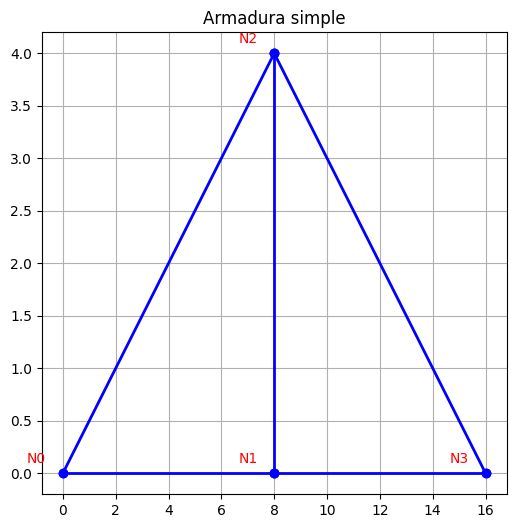

In [36]:
# Coordenadas de los nodos [x, y]
nodos = MN

# Conectividad de las barras
barras = MC

# Dibujo de la armadura
plt.figure(figsize=(6, 6))
for barra in barras:
    ni, nj = barra
    x_coords = [nodos[ni][0], nodos[nj][0]]
    y_coords = [nodos[ni][1], nodos[nj][1]]
    plt.plot(x_coords, y_coords, 'bo-', linewidth=2)

# Etiquetas de nodos
for i, (x, y) in enumerate(nodos):
    plt.text(x-1, y+0.1, f"N{i}", ha='center', color='red')

plt.grid(True)
plt.title("Armadura simple")
plt.show()